# Tarea 2
### Daniel Martínez Urrieta

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

### Solución

La función histograma debe recibir un arreglo de números $\vec{R}$ y el número $n_{hist}$ (este valor tiene que ser menor que el tamaño del vector), a partir de ello, obtener el histograma sin normalizar. Para dicha obtención, hay que notar que si $\Delta x = (\sup(\vec{R})- \inf(\vec{R}))/n_hist$ entonces $x_i$ y $x_{i-1}$ se pueden obtener de la siguiente forma:
\begin{align}
    x_i &= i\Delta x + x_0 \\
    x_{i-1} &= (i-1)\Delta x + x_0
\end{align}

Afortunadamente, `Julia` puede ordenar los valores del arreglo mediante la función `sort`, aprovechando esto, podemos revisar la condición de si un valor `R[j]` cumple que $R_j < x_i $.

Primero se creará el vector $V$ que contendrá el histograma con la función `zeros(n_hist)`, posteriormente se usará un loop `for` para llenar cada entrada `i` (desde 1 hasta `n_hist`) con el conteo de números contenidos en $[x_{i-1},x_i)$. Para realizar el conteo, se implementará otro `for` que corra desde el valor $l= (\sum_{j=1}^{i}V_j) + 1$ (ya que los valores anteriores ya fueron contados) hasta $n_hist$ por principio de cuentas. En este segundo `for` implementaremos una operación ternaria donde verifique si el valor $R_r < x_i$, en caso positivo, sumará uno en un contador, de lo contrario, se romperá el loop con la instrucción `break`, una vez terminado, almacena el valor del contador en `V[i]`, continuando el loop con reiniciando el valor del contador a 0 y calculando el siguiente $x_i$.

In [1]:
"""
`histograma(arr, n_hist)` obtiene el histograma de frecuencias sin normalizar del arreglo de N valores `Float64`
considerando `n_hist` intervalos de longitud Δx = (sup(`arr`)-inf(`arr`))/`n_hist`. Es necesario que n_hist > N. 
Dicho histograma es devuelto como un vector con `n_hist` entradas, cada entrada tiene el número de valores
encontrados en el intervalo [x_{i-1},x_i).
"""
function histograma(arr::Array{Float64,1},n_hist::Int) #Requerimos el vector de datos, así como n_hist
    n = length(arr)
    n <= n_hist ? error("Necesito que n_int sea menor que el tamaño del vector. Revisa la documentación.") :
    orden = sort(arr) #Ordena elementos aleatorios
    Δx = (orden[end] - orden[1])/n_hist #Calculamos Δx
    vector = zeros(n_hist) #Creamos el vector de salida
    for i in 1:n_hist
        contador = 0 #Contador de número de elementos en el intervalo
        x_i = i*Δx + orden[1] #Forma genérica de obtener x_i
        last = round(Int64,sum(vector[1:i]) + 1) #Aunque sé que esto siempre es entero, sum() devuelve Float64
        for r in last:n
            check = orden[r]
            check < x_i ? contador += 1 : break
        end
        vector[i] = contador
    end
    vector[end] += 1
    vector
end

histograma (generic function with 1 method)

In [2]:
? histograma

search: 

`histograma(arr, n_hist)` obtiene el histograma de frecuencias sin normalizar del arreglo de N valores `Float64` considerando `n_hist` intervalos de longitud Δx = (sup(`arr`)-inf(`arr`))/`n_hist`. Es necesario que n_hist > N.  Dicho histograma es devuelto como un vector con `n_hist` entradas, cada entrada tiene el número de valores encontrados en el intervalo [x_{i-1},x_i).


histograma



Usemos la función `histograma` dándole un vector con 1000 números aleatorios, posteriormente se graficará el vector con el histograma usando la función `xcorr` y se comparará con el que se obtenga de la función `histogram` con los datos originales.

In [3]:
using PyPlot

In [4]:
al = randn(10000)
histo = histograma(al, 100);

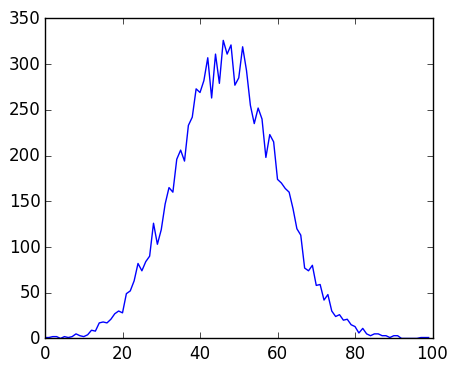

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbe90f70358>

In [31]:
figure(figsize=(5,4))
plot(histo)

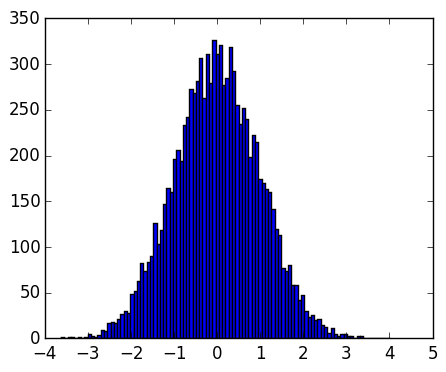

([1.0,1.0,2.0,2.0,0.0,2.0,1.0,2.0,5.0,3.0  …  3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0],[-3.62048,-3.54424,-3.46801,-3.39177,-3.31554,-3.2393,-3.16307,-3.08683,-3.0106,-2.93436  …  3.31691,3.39315,3.46938,3.54562,3.62185,3.69809,3.77432,3.85056,3.92679,4.00303],Any[PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e4850b8>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e485898>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e48c160>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e48ca58>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e491320>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e491c18>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e4994e0>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e499dd8>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e49e6d8>,PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e49ef98>  …  PyObject <matplotlib.patches.Rectangle object at 0x7fbe8e326978>,PyObject <matplo

In [34]:
figure(figsize = (5,4))
plt[:hist](al,100)

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


In [37]:
"""
`prom_var(arr)` devuelve el valor del promedio y la varianza de un `Array{Float64,1}`
"""

function prom_var(arr::Array{Float64,1})
    n = length(arr)
    prom = sum(arr)/n
    var = (sum(arr.*arr))/n -prom^2
    Val = Float64[prom, var]
    Val
end

prom_var (generic function with 1 method)

In [42]:
R = prom_var(al)

2-element Array{Float64,1}:
 -0.00771614
  0.990024  

In [43]:
R - [mean(al), var(al)]

2-element Array{Float64,1}:
  0.0       
 -9.90123e-5

***a)*** Se nota una pequeña diferencia entre el valor de la varianza calculada con mi subrutina y la que calcula Julia, con el promedio no se tiene discrepancia.

## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

1. Lugar de donde supe como encontrar mínimos y máximos [aquí](http://docs.julialang.org/en/latest/stdlib/math/?highlight=max#Base.max).
2. Sintaxis de Markdown [acá](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lists).